# Install dulu packagenya

In [1]:
# Install Package
!pip install bs4 selenium
!pip install pandas

# Impor semua tools yg dibutuhkan

In [2]:
# Setup library yang dibutuhkan
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import time

# Pop up chrome

In [3]:
# masukkan robotnya ke variable 'driver'
driver = webdriver.Chrome()
# pop up chrome muncul

# Menjalankan link

In [4]:
# masukkan link kedalam variable
adidas = 'https://www.adidas.co.id/sale.html?gad_source=1&gclid=Cj0KCQjws-S-BhD2ARIsALssG0Y6pJTaaF03ld-jJDIz8e1ro8IYN0r5Is7n34aiyo_juSjKktUaalUaArQ6EALw_wcB&gclsrc=aw.ds&page=2'
# menyuruh robot menjalankan
driver.get(adidas)

# Ambil Data

'<html lang="en" class=""><head><script type="text/javascript" async="" src="https://www.googletagmanager.com/gtag/destination?id=DC-4945219&amp;l=dataLayer&amp;cx=c&amp;gtm=45je53h1v877183940za200zb72603143&amp;tag_exp=102482433~102587591~102717422~102788824~102813109~102814060~102825837~102879719"></script><script type="text/javascript" async="" src="https://www.googletagmanager.com/gtag/destination?id=AW-758272211&amp;l=dataLayer&amp;cx=c&amp;gtm=45je53h1v877183940za200zb72603143&amp;tag_exp=102482433~102587591~102717422~102788824~102813109~102814060~102825837~102879719"></script><script type="text/javascript" async="" src="https://analytics.tiktok.com/i18n/pixel/static/identify_935b0d03.js"></script><script type="text/javascript" async="" src="https://analytics.tiktok.com/i18n/pixel/static/main.MTVjODQ0NGI5MQ.js" data-id="CJ5255JC77UFNS3Q14S0"></script><script type="text/javascript" async="" src="https://www.google-analytics.com/plugins/ua/linkid.js"></script><script type="text/jav
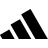
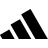
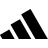
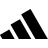
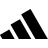
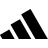
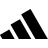
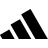
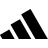
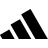
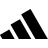
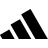
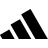
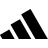
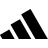
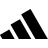
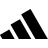
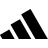
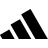
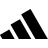

In [5]:
html = driver.page_source
html

# Merapihkan data yg udah diambil

<html class="" lang="en"><head><script async="" src="https://www.googletagmanager.com/gtag/destination?id=DC-4945219&amp;l=dataLayer&amp;cx=c&amp;gtm=45je53h1v877183940za200zb72603143&amp;tag_exp=102482433~102587591~102717422~102788824~102813109~102814060~102825837~102879719" type="text/javascript"></script><script async="" src="https://www.googletagmanager.com/gtag/destination?id=AW-758272211&amp;l=dataLayer&amp;cx=c&amp;gtm=45je53h1v877183940za200zb72603143&amp;tag_exp=102482433~102587591~102717422~102788824~102813109~102814060~102825837~102879719" type="text/javascript"></script><script async="" src="https://analytics.tiktok.com/i18n/pixel/static/identify_935b0d03.js" type="text/javascript"></script><script async="" data-id="CJ5255JC77UFNS3Q14S0" src="https://analytics.tiktok.com/i18n/pixel/static/main.MTVjODQ0NGI5MQ.js" type="text/javascript"></script><script async="" src="https://www.google-analytics.com/plugins/ua/linkid.js" type="text/javascript"></script><script async="" src="h
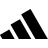
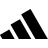
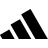
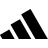
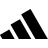
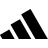
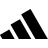
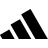
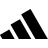
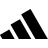
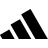
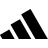
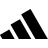
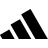
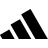
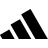
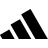
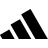
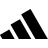
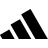

In [6]:
# merapihkan data yg udah diambil
Soup = BeautifulSoup(html, 'html.parser')
Soup

# Coding

In [7]:
# List untuk menyimpan hasil scraping
produk = []

# Looping halaman 2 sampai 7 Adidas
for page in range(2, 7):
    print(f"Scraping halaman......{page}")
    # Link Adidas berdasarkan halaman
    # https://www.adidas.co.id/sale.html?gad_source=1&gclid=Cj0KCQjws-S-BhD2ARIsALssG0Y6pJTaaF03ld-jJDIz8e1ro8IYN0r5Is7n34aiyo_juSjKktUaalUaArQ6EALw_wcB&gclsrc=aw.ds&page=2
    # https://www.adidas.co.id/sale.html?gad_source=1&gclid=Cj0KCQjws-S-BhD2ARIsALssG0Y6pJTaaF03ld-jJDIz8e1ro8IYN0r5Is7n34aiyo_juSjKktUaalUaArQ6EALw_wcB&gclsrc=aw.ds&page={page}
    adidas = f'https://www.adidas.co.id/sale.html?gad_source=1&gclid=Cj0KCQjws-S-BhD2ARIsALssG0Y6pJTaaF03ld-jJDIz8e1ro8IYN0r5Is7n34aiyo_juSjKktUaalUaArQ6EALw_wcB&gclsrc=aw.ds&page={page}'
    
    # Buka halaman di browser otomatis (robot)
    driver.get(adidas)
    
    # Tunggu beberapa detik agar halaman termuat sepenuhnya
    time.sleep(5)
    
    # Ambil HTML dari halaman
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    # Ambil semua produk dari elemen reguler (bukan iklan)
    products = soup.find_all('div', class_='css-974ipl')
    
    # Looping ke setiap produk yang ditemukan
    for product in products:
        try:
            # Ambil Kategory Produk
            category = product.find('div', class_='prd_link-product-category').text.strip()

            # Ambil Nama Produk
            name = product.find('span', class_='prd_link-product-name').text.strip()

            # Ambil Harga Produk (hapus "Rp" dan ubah ke integer)
            price = product.find('div', class_='prd_link-product-price').text.strip().replace("Rp", "").replace(".", "")
            price = int(price)

            # Ambil Warna Produk color
            color = product.find('div', class_='prd_link-product-color').text.strip()

            # Simpan ke list
            produk.append([category, name, price, color])
        
        except Exception as e:
            print("Gagal mengambil data:", e)
            continue  # Lewati produk yang error

Scraping halaman......2
Scraping halaman......3
Scraping halaman......4
Scraping halaman......5
Scraping halaman......6


In [8]:
driver = webdriver.Chrome()
category = []
name = []
price = []
color = []
for angka in range(2,7):
    web_link = f'https://www.adidas.co.id/sale.html?gad_source=1&gclid=Cj0KCQjws-S-BhD2ARIsALssG0Y6pJTaaF03ld-jJDIz8e1ro8IYN0r5Is7n34aiyo_juSjKktUaalUaArQ6EALw_wcB&gclsrc=aw.ds&page={angka}'
    driver.get(web_link)
    time.sleep(10)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    for data in soup.find_all('div', {'class':'gl-product-card__details'}):
        try:
            category.append(data.find('div',{'class':'gl-product-card__details-top'}).get_text())
        except:
            category.append(None)
        try:
            name.append(data.find('span',{'class':'gl-label gl-label--m gl-label--condensed gl-product-card__name'}).get_text())
        except:
            name.append(None)
        try:
            price.append(data.find('div', {'class':'gl-price-item gl-price-item--sale gl-price-item--small notranslate'}).get_text())
        except:
            price.append(None)
        try:
            color.append(data.find('div', {'class':'gl-product-card__color'}).get_text())
        except:
            color.append(None)
driver.close()

In [9]:
print(category)
print(name)
print(price)
print(color)

['Wanita Sportswear', 'Pria Running', 'Wanita Sportswear', 'Pria Sportswear', 'Pria Sportswear', 'Uniseks Sportswear', 'Wanita Sportswear', 'Uniseks Sportswear', 'Uniseks Sportswear', 'Anak Sepak Bola', 'Pria Sportswear', 'Wanita Sportswear', 'Pria Basket', 'Pria Basket', 'Pria Basket', 'Pria Basket', 'Pria Originals', 'Pria Originals', 'Anak Sepak Bola', 'Pria Originals', 'Pria Originals', 'Pria Basket', 'Uniseks Basket', 'Uniseks Basket', 'Wanita Originals', 'Uniseks Lifestyle', 'Uniseks Sepak Bola', 'Anak Sportswear', 'Anak Sportswear', 'Uniseks Basket', 'Uniseks Basket', 'Uniseks Basket', 'Uniseks Sepak Bola', 'Anak Sepak Bola', 'Anak Sepak Bola', 'Wanita Originals', 'Uniseks Lifestyle', 'Pria Sportswear', 'Pria Sportswear', 'Wanita Running', 'Wanita Running', 'Wanita Running', 'Wanita Running', 'Wanita Running', 'Pria Running', 'Wanita Running', 'Wanita Originals', 'Wanita Originals', 'Wanita Originals', 'Wanita Originals', 'Wanita Originals', 'Wanita Originals', 'Pria Originals',

In [10]:
df_baru = pd.DataFrame()

df_baru['Kategori'] = category
df_baru['Nama_Produk'] = name
df_baru['Harga'] = price
df_baru['Jumlah_Warna'] = color
df_baru

,Kategori,Nama_Produk,Harga,Jumlah_Warna
0,Wanita Sportswear,Adilette Comfort Slides,Rp. 300.000,None
1,Pria Running,Sepatu Pureboost 23,Rp. 1.050.000,5 warna
2,Wanita Sportswear,Ultraboost 1.0 Shoes,Rp. 1.650.000,2 warna
3,Pria Sportswear,Ultraboost 1.0 Shoes,Rp. 1.650.000,2 warna
4,Pria Sportswear,Ultraboost 1.0 Shoes,Rp. 1.650.000,2 warna
...,...,...,...,...
115,Anak Originals,adidas Originals x Disney Mickey Superstar 360...,Rp. 550.000,None
116,Anak Originals,adidas Originals x Disney Mickey Superstar 360...,Rp. 650.000,None
117,Anak Originals,adidas Originals x Disney Mickey Superstar 360...,Rp. 550.000,None
118,Anak Originals,adidas Originals x Disney Mickey Superstar 360...,Rp. 650.000,None


In [11]:
df_baru.head()

,Kategori,Nama_Produk,Harga,Jumlah_Warna
0,Wanita Sportswear,None,Rp. 300.000,None
1,Pria Running,None,Rp. 1.050.000,5 warna
2,Wanita Sportswear,None,Rp. 1.650.000,2 warna
3,Pria Sportswear,None,Rp. 1.650.000,2 warna
4,Pria Sportswear,None,Rp. 1.650.000,2 warna


In [12]:
df_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Kategori      120 non-null    object
 1   Nama_Produk   0 non-null      object
 2   Harga         120 non-null    object
 3   Jumlah_Warna  72 non-null     object
dtypes: object(4)
memory usage: 3.9+ KB


''' 
Kamu seorang Data Engineer yang sedang mengerjakan project data pipeline/ETL. Tugas kamu mengambil data dari halaman website, kemudian diolah dan disimpan ke dalam database PostgreSQL. Ikuti instruksi di bawah ini:
''' 

1. Extract. 
Proses ini kamu diminta untuk mengambil data dari sumber halaman website menggunakan web scraping dengan ketentuan sebagai berikut:
Halaman website dibebaskan asalkan bertema website retail (e-commerce, online store, dsb). Konsultasikan terlebih dahulu ke instruktur dalam pemilihan webnya
Data diambil menggunakan metode web scraping yang dibuat di file notebook (.ipynb).
Jumlah data yang terambil minimal 50 data baris data dan 4 kolom.

2. Transform.
Pada tahapan transform, kita akan melakukan pengolahan data menggunakan Pandas. Lakukan instruksi berikut:
Untuk data yang sudah diambil dari web scraping, lakukan eksplorasi data sederhana.
Cek kesesuaian tipe data terhadap value di suatu kolom.
Pastikan kolom yang seharusnya hanya mengandung angka saja seperti harga, rating, jumlah, dsb. tidak ada karakter selain angka dan tipe datanya numerik.
Simpan hasil data yang sudah diolah ke .csv

3. Load
Pada tahapan ini, data yang sudah diolah disimpan ke data storage lainnya seperti database PostgreSQL. Ikuti instruksi berikut:
Buat database PostgreSQL sesuai dengan data csv yang sudah kita olah. Sesuaikan kolom dan tipe data dengan data yang ada.
Jika diperlukan normalisasi, maka lakukan normalisasi
Input data csv ke database PostgreSQL (kamu dapat menggunakan cara seperti di Graded Challenge 1).
Tahapan load dilakukan di file .sql dan dijalankan di pgadmin.
NOTES: Seluruh proses yang dilakukan di notebook wajib menuliskan penjelasan dengan markdown/comment. Untuk proses di .sql juga ditambahkan penjelasan berupa comment seperti assignment Graded Challenge 1.

In [ ]:
# Matikan browser otomatis
driver.quit()